# Run and Plot FluSight Forecasts (2024-2025 season)<a class="anchor" id="top"></a>

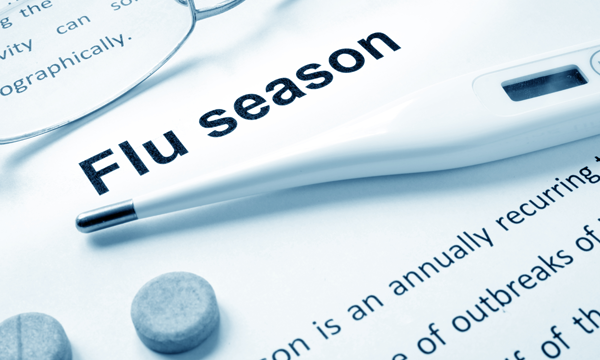

## Table of contents

* [Run forecast](#run-forecast)
* [Import forecast files](#import-forecast)
* [Plot fore quantiles](#plot-fore-quantiles)

In [1]:
import gc
import importlib
import os
from pathlib import Path
import sys
import time

import IPython.display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import ticker
# from matplotlib import dates
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd

# MANUALLY ADD RTREND LIBRARY PATH
sys.path.append("../../Rtrend_project/")
# Move to project root directory
if os.path.basename(os.getcwd()) != "programs":
    os.chdir("..")  # Move to project root
print(f"Working directory: {os.getcwd()}")

from rtrend_forecast.reporting import get_rtrend_logger, SUCCESS
import rtrend_forecast.visualization as vis
import utils.flusight_tools as fst
import utils.truth_data_structs as tds

# ------

_LOGGER = get_rtrend_logger().getChild("jupyter")
# ---
# %matplotlib notebook
%matplotlib widget
mpl.rcParams["pdf.fonttype"] = 42

main_rc = mpl.rcParams.copy()

main_rc["patch.linewidth"] = 0.
aggr_ref_tlabel = pd.Timestamp("2023-10-08")  # Sunday 00am, turns epiweek

# Define and reset the matplotlib figures in the notebook
try: 
    for _fig in mpl_figs: plt.close(_fig)
except NameError: pass
finally: mpl_figs = list()
plt.close("all")
gc.collect()
fig_kwargs = dict(num=1, clear=True) # Based on: https://stackoverflow.com/questions/28757348/how-to-clear-memory-completely-of-all-matplotlib-plots


Working directory: /Users/pventura/NonCloudStorage/Flu_forecast/programs


# Run forecast <a class="anchor" id="run-forecast"></a>

[Back to top](#top)

In [18]:
do_run = True
do_export = True
# now_str = pd.Timestamp.now().date().isoformat()
now_str = (pd.Timestamp.now() - pd.Timedelta("3d")).date().isoformat()
# now_str = "2024-04-22"  # Date of the last forecast done
print(f"Now str = {now_str}")

if do_run:
    xt0 = time.time()
    cmd = f"source activate rtrend_dev && python flusight_forecast.py --now {now_str}"
    cmd += "" if do_export else " --no-export"
    os.system(cmd)
    xtf = time.time()
    print("----------")
    print(f"Total script execution time = {xtf - xt0:0.2f}s")
else:
    print("Skipped")

Now str = 2025-02-23
[Arkansas_2025-02-22] Level 15: Forecast concluded
[Connecticut_2025-02-22] Level 15: Forecast concluded
[Alabama_2025-02-22] Level 15: Forecast concluded
[Florida_2025-02-22] Level 15: Forecast concluded
[Idaho_2025-02-22] Level 15: Forecast concluded
[Delaware_2025-02-22] WARNING: 37 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.055716116492394496.
	 – The sum is -1.4913470108969316.
[Alaska_2025-02-22] Level 15: Forecast concluded
[Georgia_2025-02-22] Level 15: Forecast concluded
[Delaware_2025-02-22] Level 15: Forecast concluded
[Illinois_2025-02-22] Level 15: Forecast concluded
[California_2025-02-22] Level 15: Forecast concluded
[District-of-Columbia_2025-02-22] WARNING: 14 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.03656974611951044.
	 –

----------
Total script execution time = 8.45s


# Import forecast files <a class="anchor" id="import-forecast"></a>

In [19]:
# -------------------------------
# PARAMETERS
# -------------------------------
truth_data_file = Path("hosp_data/truth_latest.csv")
# truth_data_file = Path("hosp_data/season_2024-2025/truth_2024-11-27.csv")
# now = pd.Timestamp(now_str)
now = pd.Timestamp.now()

# # --- Select output 
output_dir = Path("outputs/latest/")
flusight_output_file = Path("forecast_out/latest.csv")
now = pd.Timestamp(now_str)

# # # # # # # # # # # Past !! 
# output_dir = Path("outputs/flusight_2025-02-22/")
# flusight_output_file = Path("forecast_out/2025-02-22-CEPH-Rtrend_fluH.csv")
# # truth_data_file = Path("hosp_data/season_2024-2025/truth_2024-12-18.csv")

# # # Experimental
# output_dir = Path("outputs/tests/rtrend_refactor_after/")
# flusight_output_file = Path("forecast_out/tests/rtrend_refactor_after.csv")
# now = pd.Timestamp("2024-11-26")

# -------------------------------
# IMPORTS
# -------------------------------
importlib.reload(fst)
importlib.reload(tds)


obj = fst.FluSightGeneralOutputs(output_dir)
# truth = tds.FluDailyTruthData(truth_data_file)
truth = tds.FluWeeklyTruthData(truth_data_file, pop_data_path="aux_data/locations.csv")
dates = fst.FluSightDates(now)

fsobj = fst.FluSight2023Fore(flusight_output_file)

# TODO: The objects to hold the truth, forecast and hubverse forecast data should be revised!
#  They can have better patterns and be more compatible between one another.
    
obj.q_df

2025-02-23    2025-03-02    2025-03-09    2025-03-16  \
location_name quantile                                                          
Alabama       0.010       19.003606     94.017842     21.003986      3.000569   
              0.025       22.004176    103.019550     27.005125      5.000949   
              0.050       23.004365    114.021638     33.006264      9.001708   
              0.100       26.004935    127.024105     42.007972     14.002657   
              0.150       27.005125    136.025813     51.009680     18.003416   
...                             ...           ...           ...           ...   
US            0.850     5572.177482  35376.825811  30486.208256  25400.789466   
              0.900     5731.998939  36841.363213  33122.518879  28682.792576   
              0.950     5986.164681  39051.631835  37283.662066  34170.337460   
              0.975     6180.374735  40939.150089  40804.897435  38898.869227   
              0.990     6446.646630  43020.446400  44787.405136  44262.160714   

                          2025-03-23    2025-03-30    2025-04-06  
location_name quantile                                            
Alabama       0.010         0.000000      0.000000      0.000000  
              0.025         0.000000      0.000000      0.000000  
              0.050         1.000190      0.000000      0.000000  
              0.100         4.000759      0.000000      0.000000  
              0.150         6.001139      1.000190      0.000000  
...                              ...           ...           ...  
US            0.850     20603.106116  16346.405740  11105.087122  
              0.900     24097.497570  19633.127090  13669.946338  
              0.950     30059.228127  25467.922025  18278.556472  
              0.975     35360.120830  31022.157402  22821.244977  
              0.990     41492.791530  37042.111025  27919.894919  

[1219 rows x 7 columns]

# Quantile forecats <a class="anchor" id="plot-fore-quantiles"></a>

In [20]:
rc = main_rc.copy()
importlib.reload(vis)

do_save_plots = True
do_open_plots = True
# dt_behind = pd.Timedelta("3w")
dt_behind = pd.Timedelta("72w")
# dt_behind = pd.Timedelta("118w")

with plt.rc_context(rc):
    use_states = obj.q_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
    with plt.ioff():
        fig, axes = vis.make_axes_seq(num_states, max_cols=1, total_width=15., ax_height=6., fig_kwargs=fig_kwargs)  # Wider panels
        mpl_figs.append(fig)
    
    _LOGGER.info("Plotting...")
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]
        
#         truth_sr = truth.xs_state_weekly(state_name, aggr_ref_tlabel).loc[dates.now - dt_behind:]
        truth_sr = truth.xs_state(state_name).loc[dates.now - dt_behind:]
        
        # -()- From forecast submission file
        plot_df = fsobj.quantiles_df.xs(truth.state_name_to_id[state_name], level="location").T
        
#         # -()- From general dataset
#         q_df = obj.q_df.xs(state_name).copy()
#         plot_df = q_df.iloc[:, 1:]  # EXCLUDES FIRST WEEK (incomplete)        
                
        # Plot commands
        # -------------
        # --- Truth series
#         ax.plot(truth_sr, "o-", ms=3)
        ax.plot(truth_sr)
    
        # --- Quantile forecats
        previous_week = plot_df.columns[0] - pd.Timedelta("1w")
        
        vis.plot_fore_quantiles_as_area(
            ax, plot_df,  
#             prepend_point=(previous_week, truth_sr[previous_week])
        )
        
        # --- Preprocessed (filtered) data
        if state_name != "US":
            filt_sr = obj.preproc_df.xs(state_name, level="location_name")["past_denoised"]
            ax.plot(filt_sr, "--")

        # Extra
        ax.set_title(f"{state_name} ({truth.state_name_to_id[state_name]})" )
        ax.text(  # R(t) synthesis method
            0.85, 0.85, obj.meta_dict["synth_method_used"].get(state_name, "[[no-method]]"),
            transform=ax.transAxes,
        )
        
        # NHSN data "disclaimer lines": report mandates
        ax.plot(2 * [pd.Timestamp("2024-05-01")], [0, truth_sr.max()], ":")
        ax.plot(2 * [pd.Timestamp("2024-11-01")], [0, truth_sr.max()], ":")
        
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())

        ax.set_xlim(dates.now - dt_behind, dates.now + pd.Timedelta("4w"))
        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        os.makedirs("tmp_figs/", exist_ok=True)
        fig.savefig(f"tmp_figs/ct_states.pdf")
        print(f"Saved to tmp_figs dir. Click the link below to open:")
        flink = IPython.display.FileLink("../tmp_figs/ct_states.pdf")
        display(flink)
        if do_open_plots:
            os.system("open tmp_figs/ct_states.pdf")
        
    else:  # Only displays if not saved
        display(fig.canvas)



[jupyter] INFO: Plotting...
Saved to tmp_figs dir. Click the link below to open:


/Users/pventura/NonCloudStorage/Flu_forecast/tmp_figs/ct_states.pdf

# Reproduction number

[Back to run](#run-forecast)

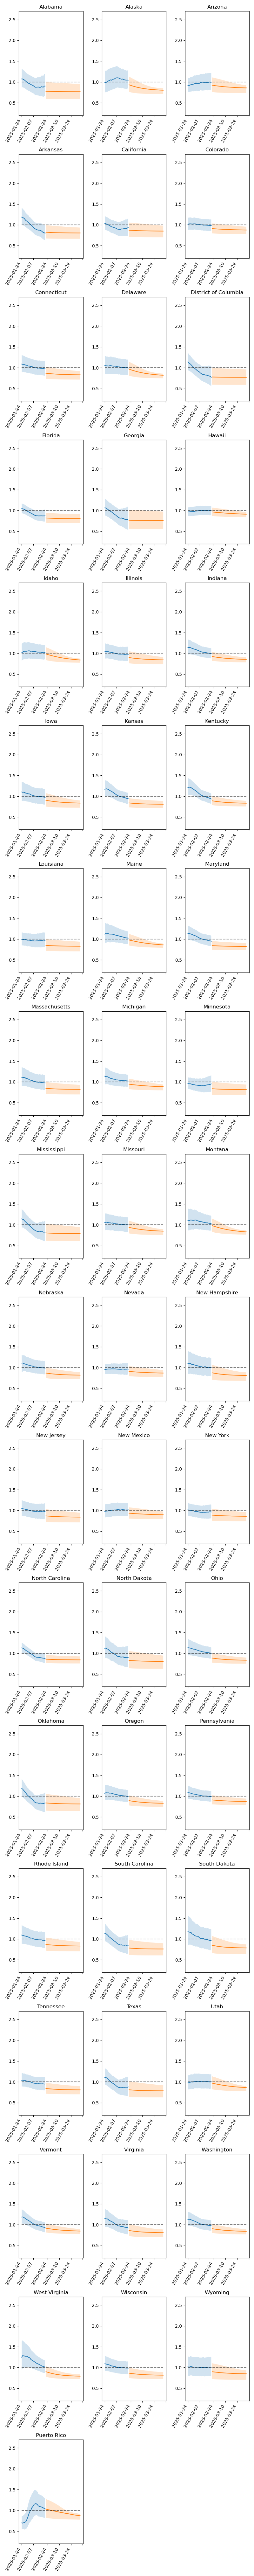

In [21]:

# ---------
rc = main_rc.copy()

do_save_plots = False

with plt.rc_context(rc):
    
#     # ----TEST
#     state_name = "California"
    use_states = obj.rt_past_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
    fig, axes = vis.make_axes_seq(num_states, total_width=8., ax_height=4.5)
    mpl_figs.append(fig)
    
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]

        rt_past = obj.rt_past_df.xs(state_name, level="location_name").iloc[1:]
        rt_fore = obj.rt_fore_df.xs(state_name, level="location_name")

        # R(t) past
        ax.plot(rt_past["rt_past_median"])
        ax.fill_between(
            rt_past.index,
            rt_past["rt_past_low_q"],
            rt_past["rt_past_high_q"],
            alpha=0.2
        )

        # R(t) fore
        ax.plot(rt_fore["rt_fore_median"])
        ax.fill_between(
            rt_fore.index,
            rt_fore["rt_fore_low_q"],
            rt_fore["rt_fore_high_q"],
            alpha=0.2
        )
        # Reference lines
        ax.plot([rt_past.index[0], rt_fore.index[-1]], [1., 1.], "k--", alpha=0.5)

        # Extra
        ax.set_title(state_name)
        ax.set_ylim(0.2, 2.7)
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        fig.savefig(f"tmp_figs/rt_states.pdf")
    

# View categorical rate change forecasts

[Back to run](#run-forecast)

In [22]:
# #-- -- - Load submittable file


fore_df = pd.read_csv(
    "forecast_out/latest.csv", 
#     "forecast_out/WEIRD_2024-12-21-CEPH-Rtrend_fluH.csv",
#     "forecast_out/2024-11-30-CEPH-Rtrend_fluH.csv",
    
    
#     "forecast_out/tests/old_forecast_test.csv", 
    parse_dates=["reference_date", "target_end_date"])

color_map = plt.get_cmap("RdYlGn")
color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

target_end_date  2025-03-01  2025-03-08  2025-03-15  2025-03-22
output_type_id                                                 
large_decrease     0.055204    0.073980    0.075000    0.038061
decrease           0.271020    0.331837    0.398980    0.485102
stable             0.158673    0.133776    0.126429    0.156939
increase           0.296020    0.246531    0.211633    0.179490
large_increase     0.219082    0.213878    0.187959    0.140408

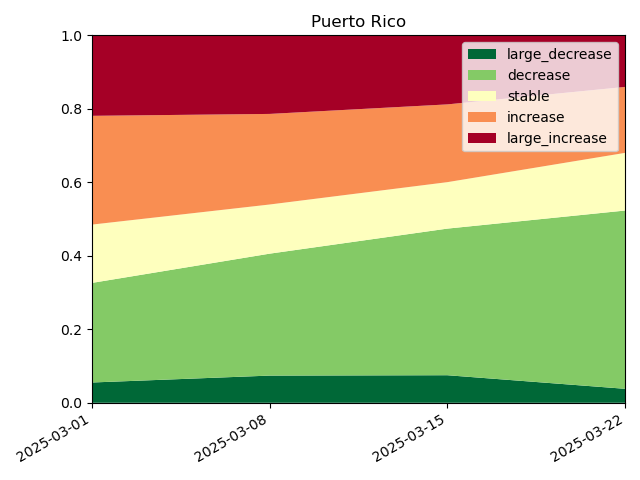

In [27]:
state_name = "Puerto Rico"  # "Illinois"  # "US"

# ----------
# -! NOTE will need to read the population file to convert between state ID and name

# -()- "Decrease" as base
rate_change_names = [
    "large_decrease", "decrease", "stable", "increase", "large_increase"]
color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

# # -()- "Increase" as base (looks better, as moving to "increase" is actually an increasing curve)
# rate_change_names = [
#     "large_increase", "increase", "stable", "decrease", "large_decrease"]
# color_i_seq = np.array([0.0, 0.25, 0.50, 0.75, 1.0])


rate_change_id = {name: i for i, name in enumerate(rate_change_names)}  # Signature: r[i] = name

# ---------------

# -! TODO: also a version that aggregates some levels.

# --- Select data (state, rate change)
df = fore_df.loc[
      (fore_df["location"] == truth.state_name_to_id[state_name])
    & (fore_df["target"] == "wk flu hosp rate change")
    & (fore_df["output_type"] == "pmf")
]

# --- Convert values into a 2D table 
df.set_index(["output_type_id", "target_end_date"], inplace=True)
df.reindex()

value_table = df["value"].unstack("target_end_date").loc[rate_change_names]
#  ^  ^  Signature: df.loc[output_type_id, target_end_date]

display(value_table)

# --------------- PLOT

rc = dict()
rc["axes.prop_cycle"] = mpl.cycler(color=color_map(color_i_seq))

with mpl.rc_context(rc):
    fig, ax = plt.subplots()

    ax.stackplot(value_table.columns, value_table, labels=rate_change_names)
    
    # TODO: set locator
    ax.legend()
    ax.set_title(state_name)
    ax.set_xlim(value_table.columns[0], value_table.columns[-1])
    ax.set_ylim(0., 1.0)
    
    ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(5))
    
    vis.rotate_ax_labels(ax, angle=30)
    fig.tight_layout()

In [92]:
# value_table.sort_index(axis=0, key=lambda s: rate_change_id[s])
value_table.loc[rate_change_names]

target_end_date  2024-12-21  2024-12-28  2025-01-04  2025-01-11
output_type_id                                                 
large_decrease     0.000000    0.000000    0.000000    0.000000
decrease           0.000000    0.000000    0.000000    0.000000
stable             0.000000    0.000000    0.000000    0.030204
increase           0.927959    0.795612    0.875306    0.969694
large_increase     0.072041    0.204388    0.124694    0.000102

----